In [21]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
#ignore warnings
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture


#random seed
np.random.seed(4324)

In [56]:
pd.set_option("display.max_columns", None)

#### ładowanie danych już po feature engineeringu

In [22]:
#load different datasets
df1 = pd.read_csv('../Data/no_standarization.csv')
df2 = pd.read_csv('../Data/raw_normalized_scaled.csv')
df3 = pd.read_csv('../Data/log_normalized.csv')
df4 = pd.read_csv('../Data/log_scaled.csv')
df4_og = df4.copy()
df5 = pd.read_csv('../Data/removed_columns_no_standarization.csv')
df = pd.read_csv('../Data/our_data.csv')


In [50]:
df.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Kansas City,1996-08-16,"Crime,Drama,Music",116.0,Robert Altman,"director,producer,writer",1925,2006,6.3,5077.0,3.823171,19000000,1353824,1353824
1,Sommersby,1993-02-05,"Drama,Mystery,Romance",114.0,Jon Amiel,"director,producer,script_department",1948,alive,6.2,22262.0,4.434679,30000000,50081992,140081992
2,We Bought a Zoo,2011-12-23,"Comedy,Drama,Family",124.0,Cameron Crowe,"writer,producer,director",1957,alive,7.1,145614.0,6.078636,50000000,75624550,118729073
3,The Spy Who Loved Me,1977-07-13,"Action,Adventure,Thriller",125.0,Lewis Gilbert,"director,writer,producer",1920,2018,7.0,110757.0,5.850243,14000000,46800000,185400000
4,Next Friday,2000-01-12,Comedy,98.0,Steve Carr,"director,producer",\N,alive,6.1,41748.0,4.643223,9500000,57176582,59675307


In [57]:
df1.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,month_sin,month_cos,number_of_professions,age,Production budget $,Domestic gross $,Worldwide gross $,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,cluster
0,116.0,503.0,6.3,5077.0,3.823171,1996,1.000000e-10,1.000000e-10,3,2,19000000.0,1353824.0,1353824.0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,114.0,299.0,6.2,22262.0,4.434679,1993,8.660254e-01,5.000000e-01,3,1,30000000.0,50081992.0,140081992.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,3
2,124.0,75.0,7.1,145614.0,6.078636,2011,1.000000e-10,1.000000e+00,3,1,50000000.0,75624550.0,118729073.0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
3,125.0,350.0,7.0,110757.0,5.850243,1977,1.000000e-10,1.000000e-10,3,2,14000000.0,46800000.0,185400000.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
4,98.0,568.0,6.1,41748.0,4.643223,2000,5.000000e-01,8.660254e-01,2,2,9500000.0,57176582.0,59675307.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
df4.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,month_sin,month_cos,number_of_professions,Production budget $,Domestic gross $,Worldwide gross $
0,0.405323,0.964779,-0.018074,-1.307400,-0.747546,-0.583680,-0.663645,-0.851327,0.307763,0.015150,-1.298695,-1.576105
1,0.305015,0.775783,-0.108932,-0.461400,-0.279980,-0.807929,1.646125,0.565177,0.307763,0.341977,0.522675,0.732400
2,0.790106,0.275584,0.666924,0.613575,0.755203,0.532535,-0.663645,1.570202,0.307763,0.707492,0.730561,0.650105
3,0.836463,0.832979,0.585094,0.456958,0.626737,-2.009650,-0.663645,-0.851327,0.307763,-0.203362,0.488485,0.871871
4,-0.566552,1.008970,-0.201062,-0.101509,-0.132486,-0.285205,0.837662,1.327973,-1.224538,-0.480823,0.589503,0.307795


### przypomnienie łokci

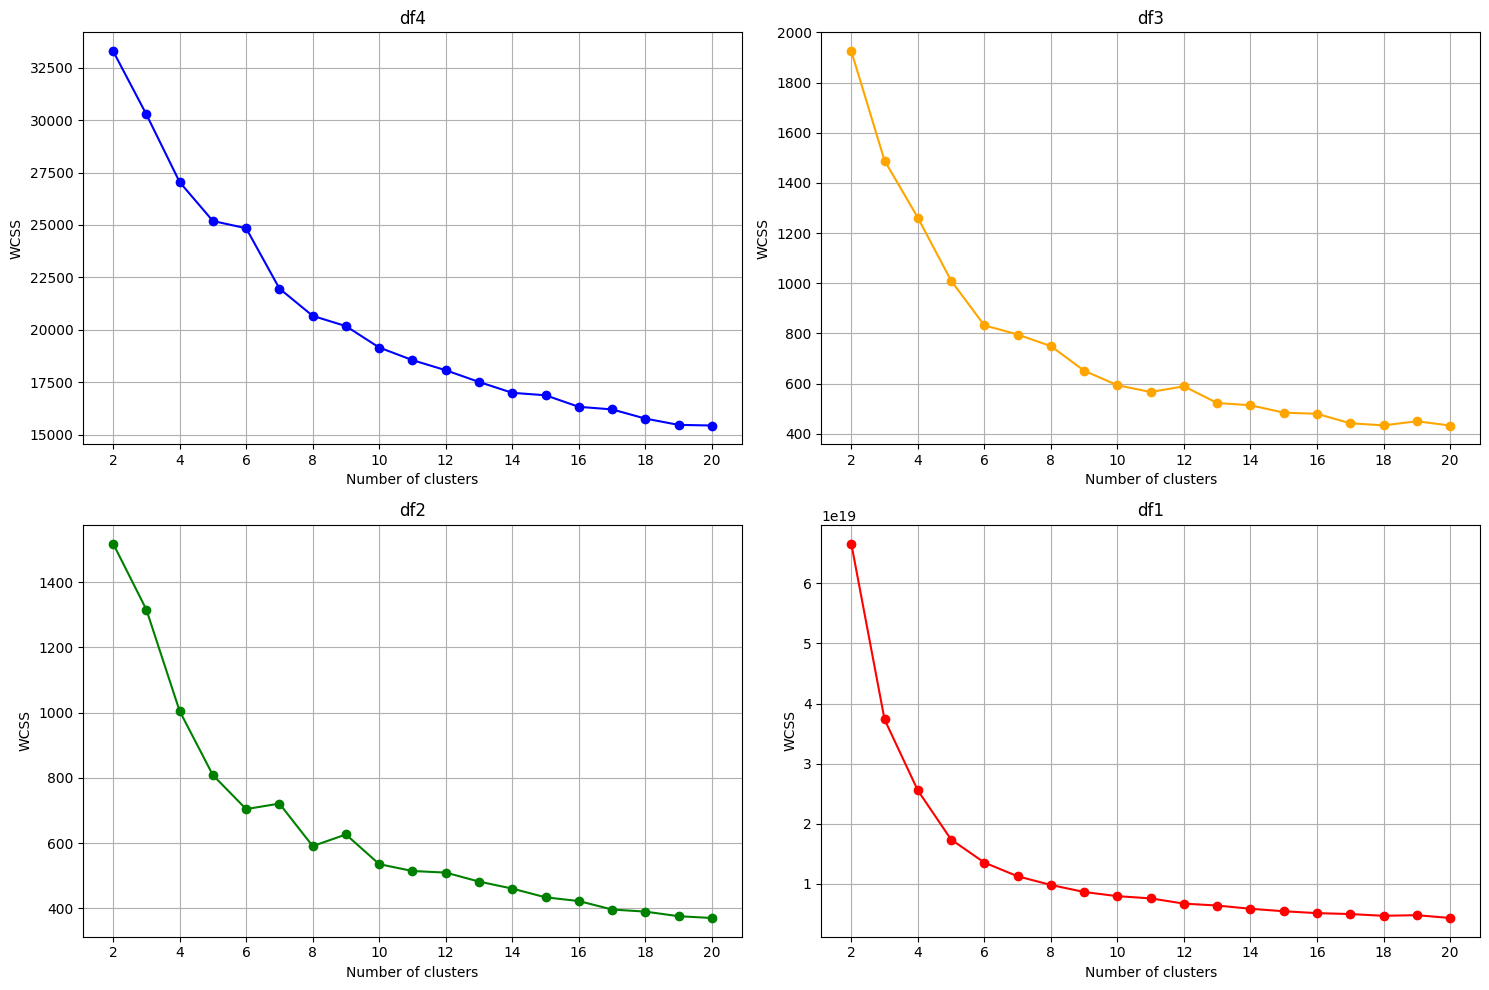

In [24]:

def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

# Assuming v1, v2, v3, and v4 are your datasets
wcss_df4 = calculate_wcss(df4)
wcss_df3 = calculate_wcss(df3)
wcss_df2 = calculate_wcss(df2)
wcss_df1 = calculate_wcss(df1)


# Assuming wcss_v1, wcss_v2, wcss_v3, and wcss_v4 are defined lists
wcss_list = [wcss_df4, wcss_df3, wcss_df2, wcss_df1]
titles = ['df4', 'df3', 'df2', 'df1']
colors = ['b', 'orange', 'green', 'r']

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, (wcss, title, color) in enumerate(zip(wcss_list, titles, colors)):
    row = i // 2
    col = i % 2
    axs[row, col].plot(range(2, 21), wcss, marker='o', color=color)
    axs[row, col].set_title(title)
    axs[row, col].set_xlabel('Number of clusters')
    axs[row, col].set_ylabel('WCSS')
    axs[row, col].set_xticks(range(2, 22, 2))  # Set x-ticks every 2 units
    axs[row, col].grid()

plt.tight_layout()
plt.show()



optymalnie z łokcia myślę 7 klastrów, df4 lekko fika tam dla 7,ale dla reszty można uogólnić

### Modelowanie (na razie zrobione dla 7 klastrów (w metodach w których podaje się liczbe klastrów i tylko na ramce z nieprzeskalowanymi danymi, żeby sprawdzić analogicznie reszte wariantów opisałam na dole))

In [25]:
# wypróbuj różne metoday klasteryzacji dla N klastrów
def perform_clustering1(df4, N, df4_results,eps):
    # KMeans
    # how does KMeans work
    # 1. Randomly initialize the centroids
    # 2. Assign each data point to the closest centroid
    # 3. Recompute the centroids
    # 4. Repeat steps 2 and 3 until convergence

    kmeans = KMeans(n_clusters=N)
    kmeans.fit(df4)
    df4_results['kmeans'] = kmeans.labels_

    # AgglomerativeClustering
    # how does AgglomerativeClustering work
    # 1. Start with n clusters, each data point is a cluster
    # 2. Merge the two closest clusters
    # 3. Repeat step 2 until only a single cluster remains

    agglomerative = AgglomerativeClustering(n_clusters=N)
    agglomerative.fit(df4)
    df4_results['agglomerative'] = agglomerative.labels_

    # DBSCAN
    # how does DBSCAN work
    # 1. Randomly initialize a point
    # 2. Find all points within the eps distance from the point
    # 3. If there are more than min_samples points within eps distance, create a cluster
    # 4. Repeat steps 2 and 3 until all points are visited
    # find best eps and min_samples
    # eps - maximum distance between two samples for one to be considered as in the neighborhood of the other
    # min_samples - number of samples in a neighborhood for a point to be considered as a core point

    # function fo finding best eps and min_samples
    def find_best_eps_min_samples(data):
        from sklearn.neighbors import NearestNeighbors
        neigh = NearestNeighbors(n_neighbors=2)
        neigh.fit(data)
        distances, indices = neigh.kneighbors(data)
        distances = np.sort(distances, axis=0)
        distances = distances[:, 1]
        plt.plot(distances)
        plt.axhline(y=2, color='r', linestyle='--')
        plt.title('Distances for DBSCAN')
        plt.show()

    find_best_eps_min_samples(df4)
    #what does the plot show
    # the plot shows the distances between each point and its closest neighbor
    # the point where the plot starts to grow rapidly is the best eps value


    dbscan = DBSCAN(eps=eps, min_samples=6) # dla innych danych trzeba zmienić eps i min_samples DB4 eps=2, min_samples=6, DB3 eps=0.3
    dbscan.fit(df4)
    df4_results['dbscan'] = dbscan.labels_

    # Birch
    # how is Birch different from KMeans
    # 1. Birch builds a tree structure to represent the data
    # 2. Birch does not require the number of clusters to be specified
    # 3. Birch does not require the data to be stored in memory
    # 4. Birch is faster than KMeans
    # ale generalnie Birch działa na podobnej zasadzie co KMeans

    birch = Birch(n_clusters=N)
    birch.fit(df4)
    df4_results['birch'] = birch.labels_

    # MiniBatchKMeans
    # how does MiniBatchKMeans work
    # MiniBatchKMeans uses mini-batches of data to update the centroids (other than that works like KMeans)

    mini_batch_kmeans = MiniBatchKMeans(n_clusters=N)
    mini_batch_kmeans.fit(df4)
    df4_results['mini_batch_kmeans'] = mini_batch_kmeans.labels_



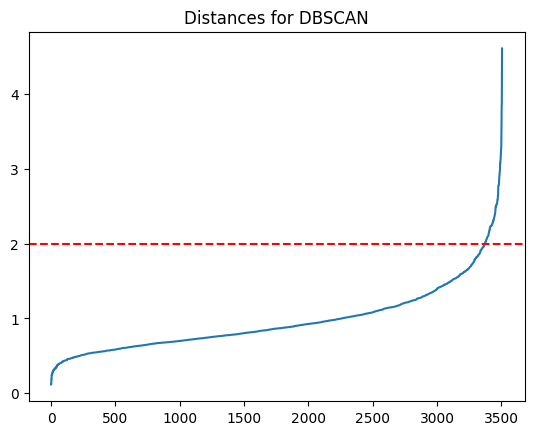

In [26]:
df4_results = pd.DataFrame()
perform_clustering1(df4, 7, df4_results,2)

z tego wykresu widać że najselnsowniej wybrać koło 2 pewnie jako eps, bo tam zaczyna rosnąć najbardziej

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
df4_tsne = tsne.fit_transform(df4)
df3_tsne = tsne.fit_transform(df3)
df2_tsne = tsne.fit_transform(df2)
df1_tsne = tsne.fit_transform(df1)
df5_tsne = tsne.fit_transform(df5)

# use standard scaler for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df4_s = scaler.fit_transform(df4)
df3_s = scaler.fit_transform(df3)
df2_s = scaler.fit_transform(df2)
df1_s = scaler.fit_transform(df1)
df5_s = scaler.fit_transform(df5)

pca = PCA(n_components=2)
df4_pca = pca.fit_transform(df4_s)
df3_pca = pca.fit_transform(df3_s)
df2_pca = pca.fit_transform(df2_s)
df1_pca = pca.fit_transform(df1_s)
df5_pca = pca.fit_transform(df5_s)


pca = PCA(n_components=3)
df4_pca2 = pca.fit_transform(df4_s)
df3_pca2 = pca.fit_transform(df3_s)
df2_pca2 = pca.fit_transform(df2_s)
df1_pca2 = pca.fit_transform(df1_s)
df5_pca2 = pca.fit_transform(df5_s)


In [28]:
def plot_clusters(df4, df4_pca, df4_pca2, df4_tsne): # Plotujemy 5 ostatnich kolumn
    # Plot the results using TSNE
    fig, axs = plt.subplots(5, 2, figsize=(15, 15))

    for i, (col, ax) in enumerate(zip(df4.columns[-10:], axs.flatten())):
        ax.scatter(df4_tsne[:, 0], df4_tsne[:, 1], c=df4[col], cmap='tab10')
        ax.set_title(col)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # Plot the results using PCA
    fig, axs = plt.subplots(5, 2, figsize=(15, 15))

    for i, (col, ax) in enumerate(zip(df4.columns[-10:], axs.flatten())):
        ax.scatter(df4_pca[:, 0], df4_pca[:, 1], c=df4[col], cmap='tab10')
        ax.set_title(col)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

    # Plot the results using PCA2 in 3d using plotly express
    import plotly.express as px
    import plotly.io as pio
    pio.renderers.default = 'browser'
    
    for i, col in enumerate(df4.columns[-10:]):
        fig = px.scatter_3d(x=df4_pca2[:, 0], y=df4_pca2[:, 1], z=df4_pca2[:, 2], color=df4[col])
        fig.show()


In [29]:
def perform_clustering2(df4, N, df4_results):
    # MeanShift
    # how does MeanShift work
    # 1. Randomly initialize the centroids
    # 2. Find the points within the bandwidth distance from the centroid
    # 3. Recompute the centroid as the mean of the points within the bandwidth distance
    # 4. Repeat steps 2 and 3 until convergence

    # what is bandwidth
    # bandwidth is the distance within which the points are considered to be close to each other
    # points outside the bandwidth distance are considered to be outliers

    # how is it different from KMeans
    # 1. MeanShift does not require the number of clusters to be specified
    # 2. MeanShift does not require the data to be stored in memory
    # 3. MeanShift is slower than KMeans

    mean_shift = MeanShift()
    mean_shift.fit(df4)
    df4_results['mean_shift'] = mean_shift.labels_

    # SpectralClustering
    # how does SpectralClustering work
    # 1. Construct a similarity matrix
    # 2. Compute the Laplacian matrix
    # 3. Compute the eigenvectors of the Laplacian matrix
    # 4. Use the eigenvectors to cluster the data

    spectral_clustering = SpectralClustering(n_clusters=N)
    spectral_clustering.fit(df4)
    df4_results['spectral_clustering'] = spectral_clustering.labels_

    # AffinityPropagation
    # how does AffinityPropagation work
    # 1. Compute the similarity matrix
    # 2. Compute the availability matrix
    # 3. Compute the responsibility matrix
    # 4. Compute the cluster centers
    # 5. Assign each data point to the closest cluster center

    affinity_propagation = AffinityPropagation()
    affinity_propagation.fit(df4)
    df4_results['affinity_propagation'] = affinity_propagation.labels_

    # OPTICS
    # how does OPTICS work
    # 1. Construct a reachability graph
    # 2. Compute the ordering of the points
    # 3. Extract the clusters from the ordering

    optics = OPTICS(min_samples=5)
    optics.fit(df4)
    df4_results['optics'] = optics.labels_

    # GaussianMixture
    # how does GaussianMixture work
    # 1. Initialize the parameters of the Gaussian distribution
    # 2. Compute the probability of each data point belonging to each cluster
    # 3. Update the parameters of the Gaussian distribution
    # 4. Repeat steps 2 and 3 until convergence
    
    gaussian_mixture = GaussianMixture(n_components=3)
    gaussian_mixture.fit(df4)
    df4_results['gaussian_mixture'] = gaussian_mixture.predict(df4)

In [30]:
perform_clustering2(df4, 7, df4_results)

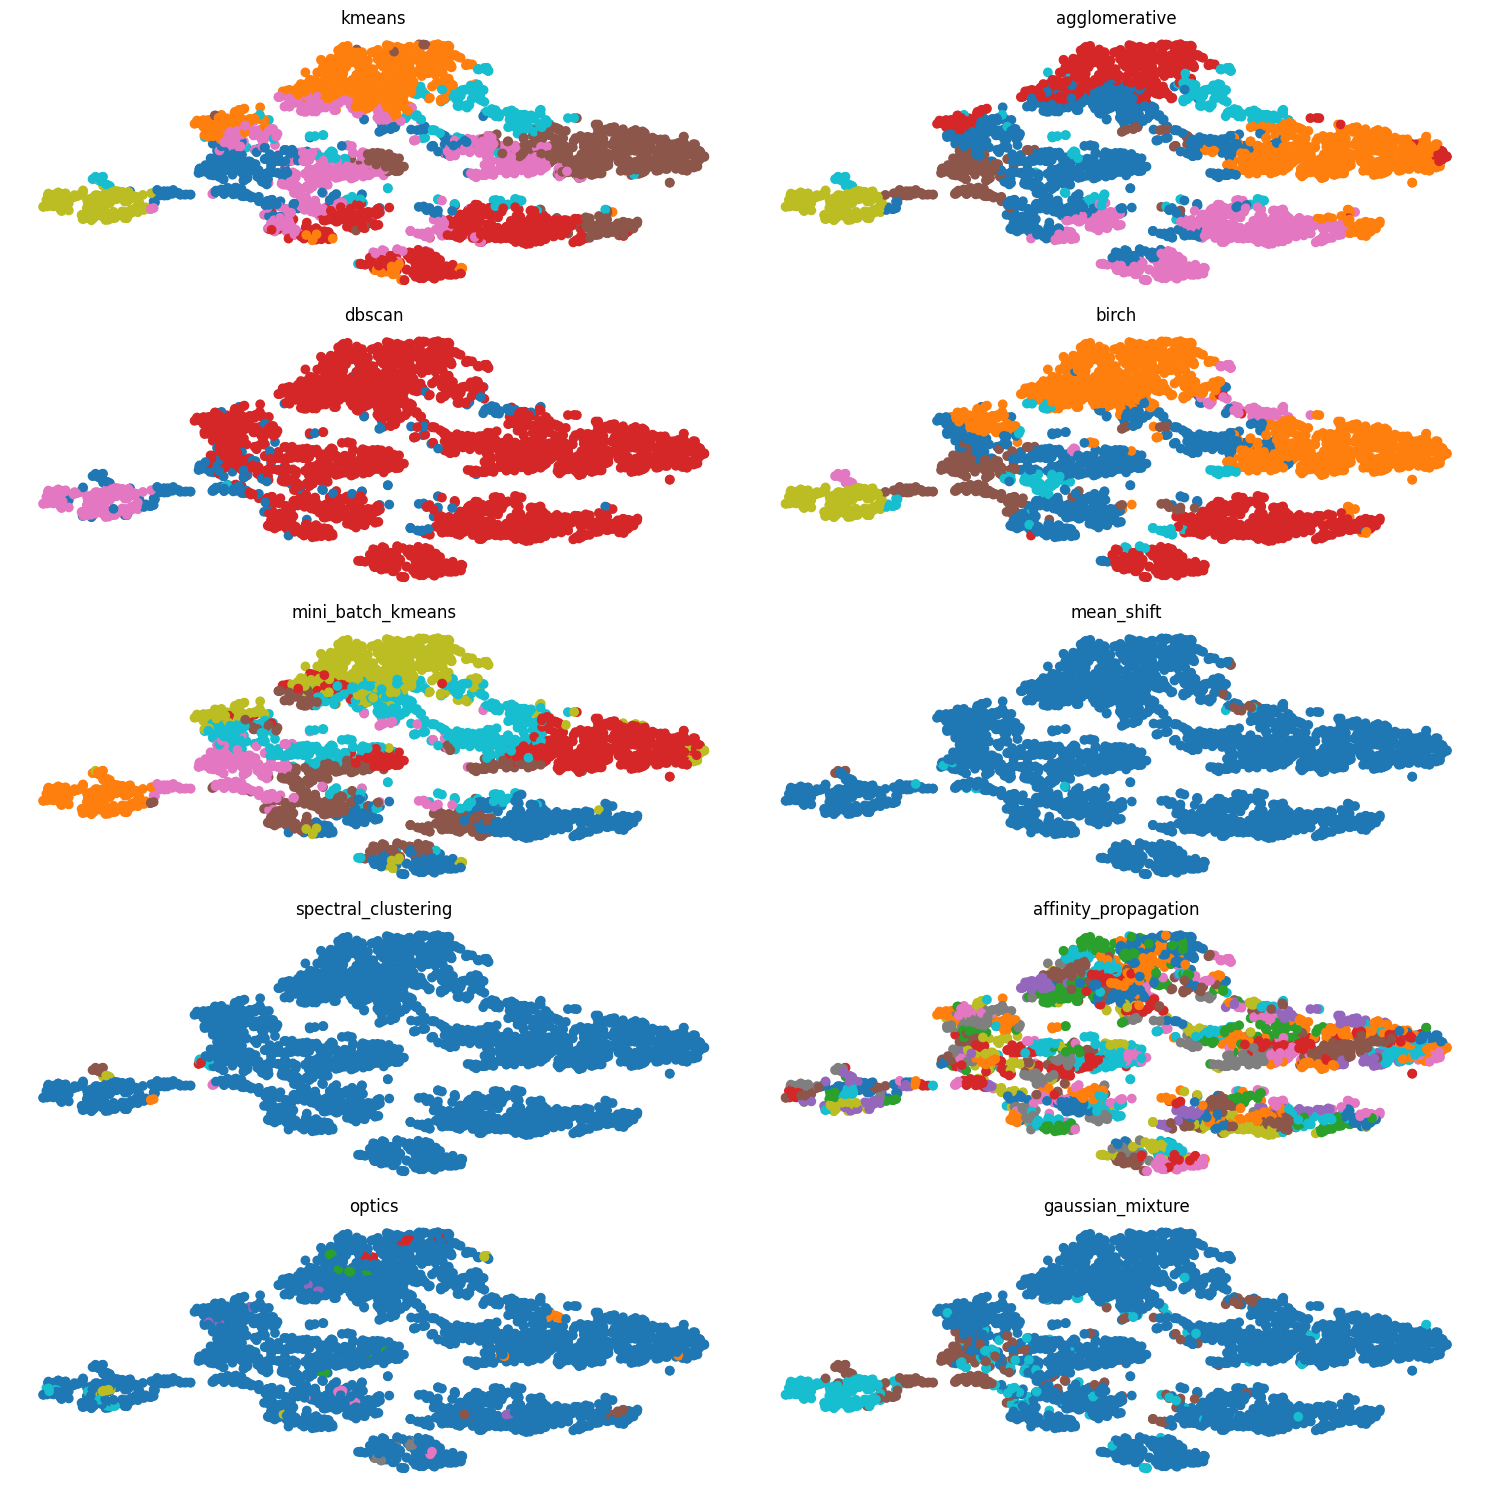

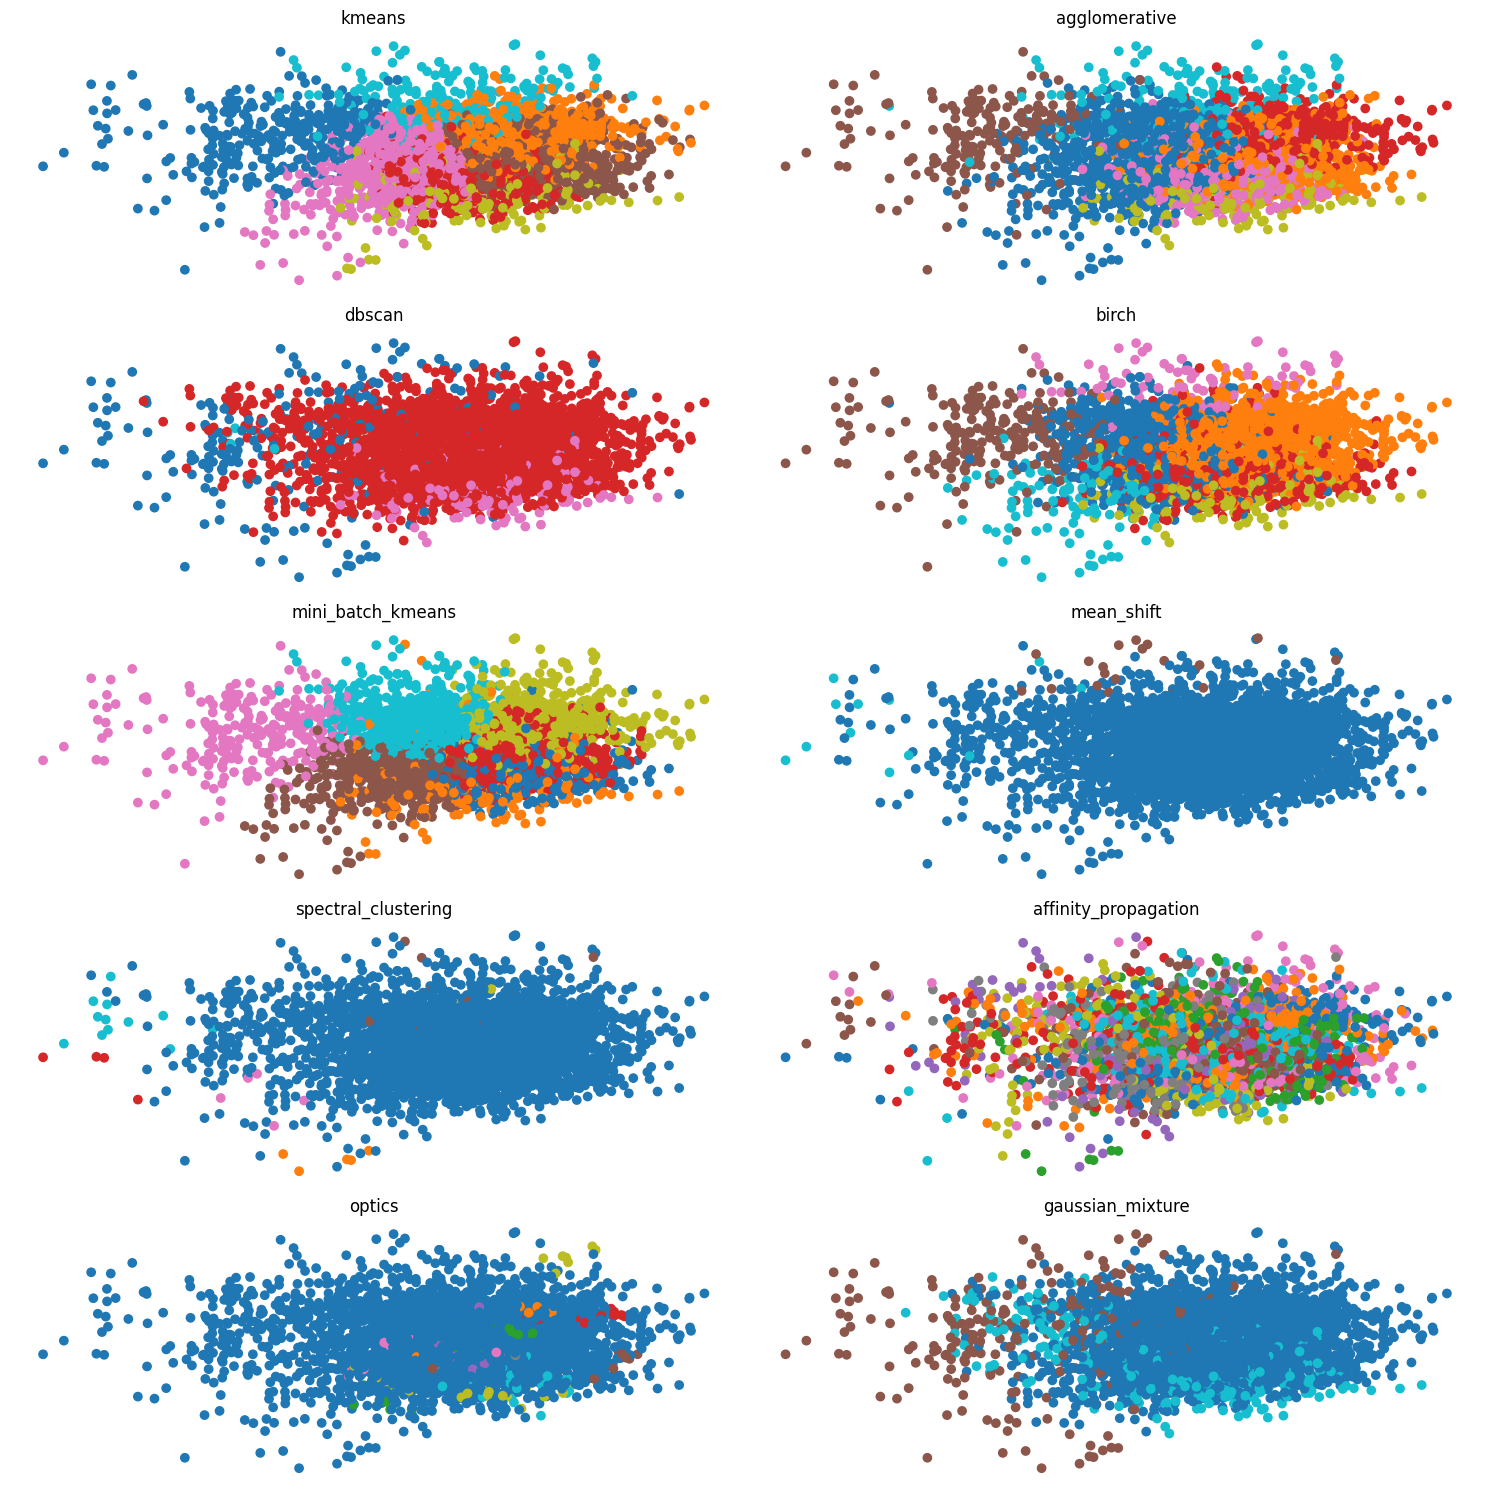

In [31]:
plot_clusters(df4_results, df4_pca, df4_pca2, df4_tsne)

niżej ożna dodać jakies metryki jeszcze jak są

In [32]:
# create a table analysing the results using silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

def calculate_scores(df4_results):
    scores = pd.DataFrame(index=df4_results.columns, columns=['silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score'])
    for col in df4_results.columns:
        scores.loc[col, 'silhouette_score'] = silhouette_score(df4, df4_results[col])
        scores.loc[col, 'calinski_harabasz_score'] = calinski_harabasz_score(df4, df4_results[col])
        scores.loc[col, 'davies_bouldin_score'] = davies_bouldin_score(df4, df4_results[col])
        #scores.loc[col, 'adjusted_rand_score'] = adjusted_rand_score(df4['kmeans'], df4_results[col])
    return scores

In [33]:
df4_results

,kmeans,agglomerative,dbscan,birch,mini_batch_kmeans,mean_shift,spectral_clustering,affinity_propagation,optics,gaussian_mixture
0,4,0,0,0,6,0,0,20,-1,0
1,2,4,0,2,0,0,0,155,-1,0
2,1,2,0,1,5,0,0,29,-1,0
3,6,1,0,1,2,0,0,82,-1,0
4,2,0,0,1,0,0,0,143,-1,2
...,...,...,...,...,...,...,...,...,...,...
3501,3,1,0,1,6,0,0,60,-1,0
3502,2,4,0,2,0,0,0,21,-1,0
3503,1,2,0,1,5,0,0,17,-1,0
3504,3,0,0,0,6,0,0,145,-1,0


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [35]:


def calculate_best_model(scores):
    # Przeskalowanie kolumn
    epsilon = 1e-5

    # Przeskalowanie kolumny 'calinski_harabasz_score'
    scores['calinski_harabasz_score_scaled'] = scaler.fit_transform(scores[['calinski_harabasz_score']])
    scores['calinski_harabasz_score_scaled'] = scores['calinski_harabasz_score_scaled'] * (1 - 2 * epsilon) + epsilon

    # Przeskalowanie kolumny 'davies_bouldin_score'
    scores['davies_bouldin_score_scaled'] = scaler.fit_transform(scores[['davies_bouldin_score']])
    scores['davies_bouldin_score_scaled'] = scores['davies_bouldin_score_scaled'] * (1 - 2 * epsilon) + epsilon

    scores = scores[scores['silhouette_score'] > 0]

    #sil score
    max_silhouette_score = scores['silhouette_score'].max()
    scores['silhouette_score_scaled'] = scores['silhouette_score'] / max_silhouette_score
    scores.loc[scores['silhouette_score'] == max_silhouette_score, 'silhouette_score_scaled'] = 1

    #cal_score
    max_calinski_score = scores['calinski_harabasz_score_scaled'].max()
    scores['calinski_score_scaled'] = scores['calinski_harabasz_score_scaled'] / max_calinski_score
    scores.loc[scores['calinski_harabasz_score_scaled'] == max_calinski_score, 'calinski_score_scaled'] = 1  

    #davies score
    min_davies_score = scores['davies_bouldin_score_scaled'].min()
    scores['davies_score_scaled'] = 1 - min_davies_score / scores['davies_bouldin_score_scaled'] 
    scores.loc[scores['davies_bouldin_score_scaled'] == min_davies_score, 'davies_score_scaled'] = 1   

    #suma
    scores['suma'] = scores['silhouette_score_scaled'] + scores['calinski_score_scaled'] + scores['davies_score_scaled']


    # Indeks najlepszego algorytmu
    best_algorithm_index = scores['suma'].idxmax()
    return best_algorithm_index


In [36]:
scores = calculate_scores(df4_results)
print(scores)

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.156005               532.28245   
agglomerative                0.119197              439.370465   
dbscan                       0.227346               218.00668   
birch                        0.140588              422.930777   
mini_batch_kmeans            0.141176              519.317135   
mean_shift                   0.371101                 54.2612   
spectral_clustering          0.292428               31.672814   
affinity_propagation         0.127554              101.217509   
optics                      -0.462526                6.227234   
gaussian_mixture             0.227687               308.37504   

                     davies_bouldin_score  
kmeans                           1.672573  
agglomerative                    1.741751  
dbscan                           1.752422  
birch                             1.70906  
mini_batch_kmeans                1.743314  
mean_shift          

In [37]:
# plot the results
def plot_scores(scores):
    fig, axs = plt.subplots(1, 3, figsize=(15, 10))

    for i, (score, ax) in enumerate(zip(scores.columns, axs.flatten())):
        ax.bar(scores.index, scores[score])
        ax.set_title(score)
        ax.set_xticklabels(scores.index, rotation=45)
        ax.grid()
    plt.tight_layout()
    plt.show()

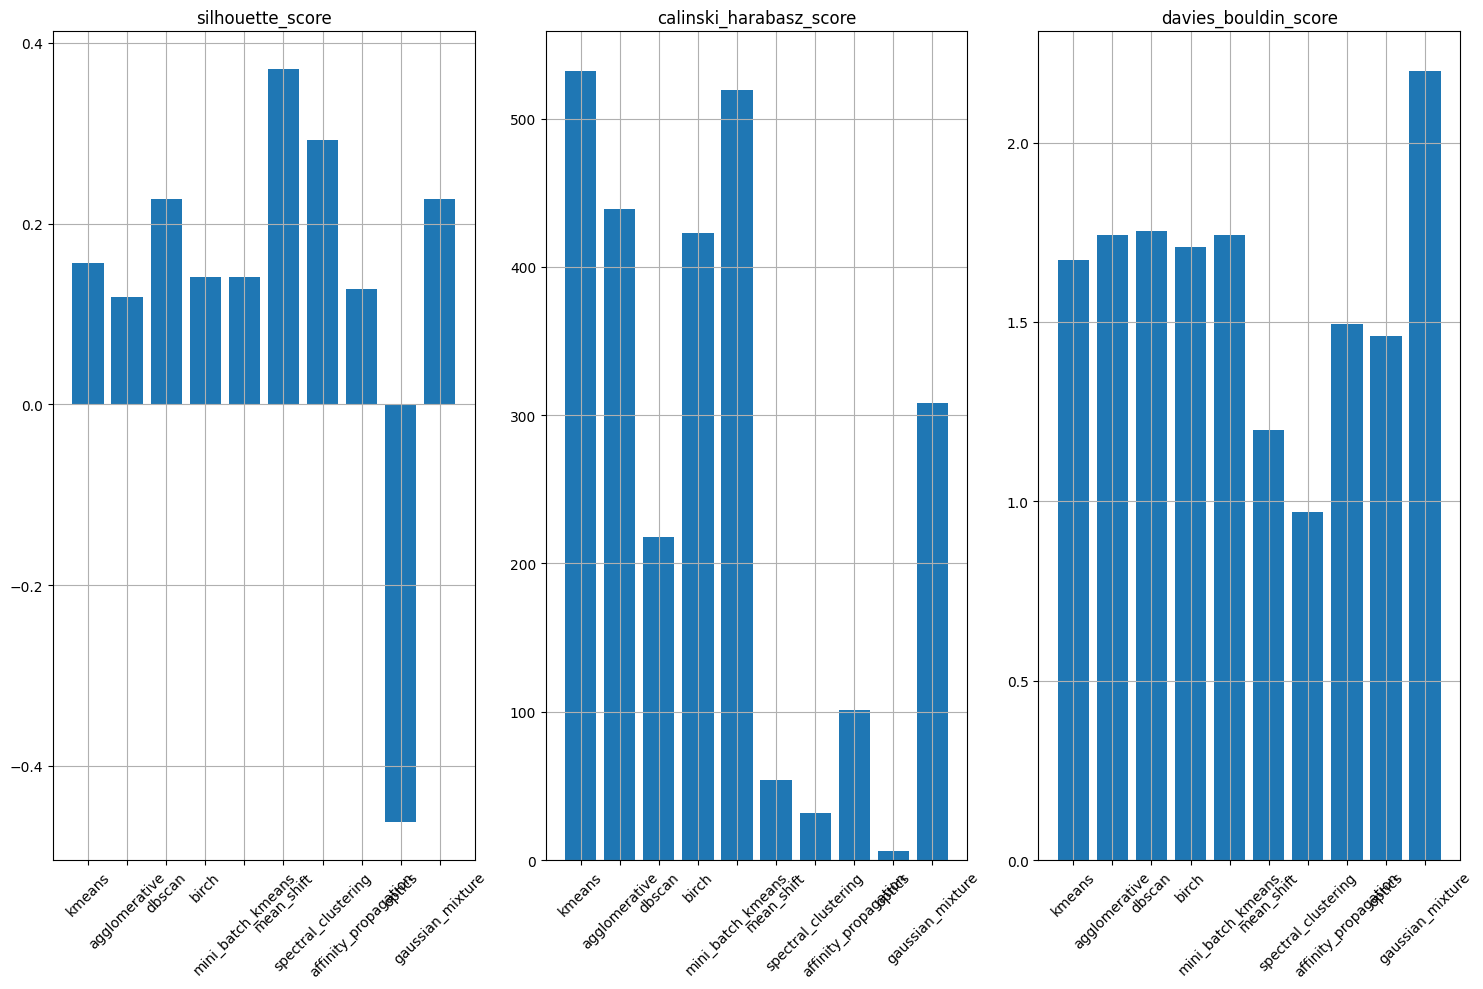

In [38]:
scores = calculate_scores(df4_results)
plot_scores(scores)

In [39]:
calculate_best_model(scores)

'kmeans'

jeśli zostawimy tyle modeli to może wypadałoby coś o nich się więcej dowiedzieć jak działają, komentarze do działania są przez copilot napisane, o metrykach sprawdzania też

tą funkcję z rekomendacją możaby chyba wrzucić, tak na koniec jako właśnie zastosowanie biznesowe żeby powtórzyć, używając już klasteringu tego najlepszego

dopisałabym funkcje która jakoś na podstawie tych indywidualnych scorów liczy który mode jest najlepszy (wziąć pod uwagę który score powinien być jak najmniejszy, który jak największy itd.)

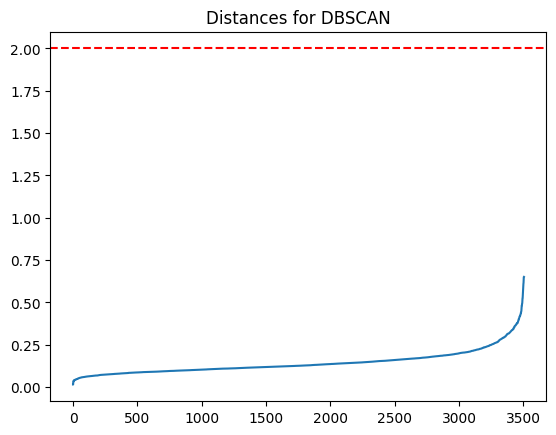

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.118328              299.611148   
agglomerative                 0.12412              307.788083   
dbscan                      -0.029183               97.571531   
birch                         0.11156              250.896305   
mini_batch_kmeans            0.127072              312.838505   
mean_shift                    0.28126              365.720889   
spectral_clustering          0.121702              305.167282   
affinity_propagation         0.059107               100.05376   
optics                      -0.447996                 7.47607   
gaussian_mixture             0.083183              402.981497   

                     davies_bouldin_score  
kmeans                           2.332768  
agglomerative                    2.351117  
dbscan                            2.88316  
birch                            2.375047  
mini_batch_kmeans                2.311434  
mean_shift          

In [40]:
#wyżej sprawdzone tylko dla df4, teraz dla df3
#uwaga trzeba recznie w dbscanie w perform_clustering1 zmienić eps na lepsze, bo inaczej nie działa dobrze, dla df3 np były dobry 0.30 na oko eps
df3_results = pd.DataFrame()
perform_clustering1(df3, 7, df3_results,0.3)
perform_clustering2(df3, 7, df3_results)
scores = calculate_scores(df3_results)
print(scores)

# plot the results
#plot_clusters(df3_results,df3_pca, df3_pca2, df3_tsne)

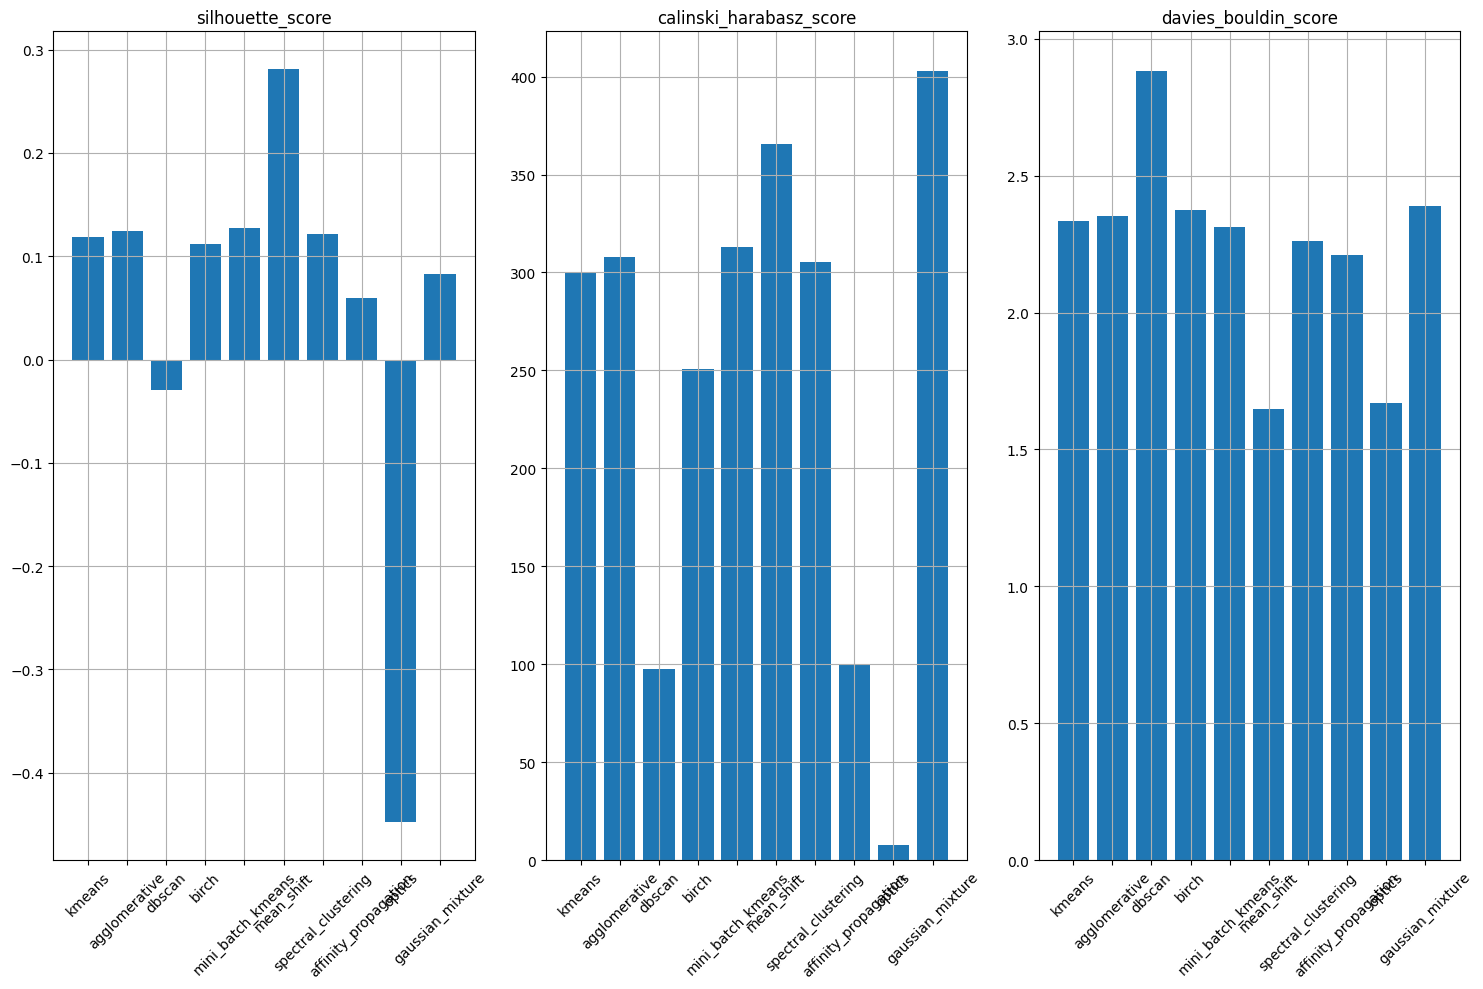

In [41]:
plot_scores(scores)

In [42]:
calculate_best_model(scores)

'mean_shift'

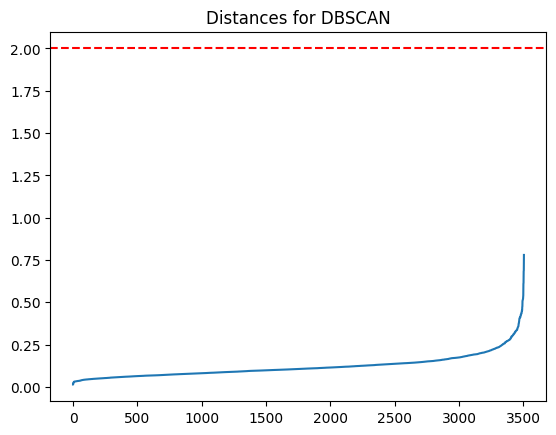

                     silhouette_score calinski_harabasz_score  \
kmeans                       0.068165              240.698686   
agglomerative                0.077196              239.418503   
dbscan                       0.029045               92.359873   
birch                         0.11701              133.434494   
mini_batch_kmeans            0.060201               228.27315   
mean_shift                   0.280487              365.207259   
spectral_clustering           0.05928              213.885866   
affinity_propagation        -0.029893               57.678188   
optics                      -0.422047                7.486985   
gaussian_mixture             0.072571              222.184367   

                     davies_bouldin_score  
kmeans                           2.676591  
agglomerative                    2.701878  
dbscan                           3.296279  
birch                            2.058373  
mini_batch_kmeans                2.795606  
mean_shift          

In [43]:
df2_results = pd.DataFrame()
perform_clustering1(df2, 7, df2_results,0.3)
perform_clustering2(df2, 7, df2_results)
scores = calculate_scores(df2_results)
print(scores)

# plot the results
#plot_clusters(df3_results,df3_pca, df3_pca2, df3_tsne)

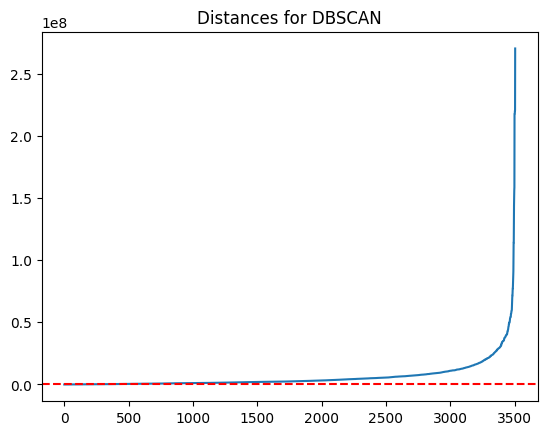

In [44]:
df1_results = pd.DataFrame()
perform_clustering1(df1, 7, df1_results,0.3)
perform_clustering2(df1, 7, df1_results)


In [45]:
df1_results.nunique()

kmeans                    7
agglomerative             7
dbscan                    1
birch                     7
mini_batch_kmeans         7
mean_shift               24
spectral_clustering       7
affinity_propagation    137
optics                  156
gaussian_mixture          3
dtype: int64

In [46]:
df1_resultss = df1_results.drop('dbscan', axis=1)

In [47]:
scores = calculate_scores(df1_resultss)
print(scores)

                     silhouette_score calinski_harabasz_score  \
kmeans                      -0.003947              131.639922   
agglomerative                -0.00336               149.75601   
birch                        -0.00336               149.75601   
mini_batch_kmeans           -0.003682              186.492836   
mean_shift                  -0.060183               12.904499   
spectral_clustering         -0.025466                 0.75649   
affinity_propagation        -0.187102               11.771811   
optics                      -0.326703                5.185165   
gaussian_mixture            -0.057607               87.420698   

                     davies_bouldin_score  
kmeans                           5.504526  
agglomerative                    5.308626  
birch                            5.308626  
mini_batch_kmeans                4.811583  
mean_shift                       3.231401  
spectral_clustering             40.651206  
affinity_propagation             6.255016

warto by było dla różnej liczby klastrów też sprawdzić, znaczy niektóre metody same wybierają ile, ale do niektórych się podaje ile (jako argument w perform_clustering)

In [51]:
title = df['movie_title'].to_frame()

In [52]:
#title = pd.read_csv('../Data/titles.csv')
df3 = df3.join(title)

In [145]:
df3.columns

Index(['runtime_minutes', 'director_name', 'movie_averageRating',
       'movie_numerOfVotes', 'approval_Index', 'production_year', 'month_sin',
       'month_cos', 'number_of_professions', 'Production budget $',
       'Domestic gross $', 'Worldwide gross $', 'movie_title', 'cluster'],
      dtype='object')

: 

In [54]:
features = ['runtime_minutes', 'director_name', 'movie_averageRating',
       'movie_numerOfVotes', 'approval_Index', 'production_year', 'month_sin',
       'month_cos', 'number_of_professions', 'Production budget $',
       'Domestic gross $', 'Worldwide gross $']

In [65]:
import tkinter as tk
from tkinter import messagebox

def recommend_similar_movies(movie_title, n_recommendations=5):
    kmeans = KMeans(n_clusters=7, random_state=42)
    df3["cluster"] = kmeans.fit_predict(df3[features])
    movie_cluster = df3[df3["movie_title"] == movie_title]["cluster"].values[0]
    similar_movies = df3[(df3["cluster"] == movie_cluster) & (df3["movie_title"] != movie_title)]
    return similar_movies.sample(n=n_recommendations)['movie_title'].tolist()
def search_data(movie_list:list):
    info = []
    for movie in movie_list:
        matched = df[df['movie_title'] == movie]
        matched = matched[['movie_title', 'production_date', 'genres', 'runtime_minutes','director_name','movie_averageRating', 'movie_numerOfVotes',
       'approval_Index',]]
        if not matched.empty:
            inf = matched.iloc[0]
            formatted_info = "{} | Date: {} | Genres: {} | Runtime: {} | Director: {} | Rating: {} | Votes: {} | Approval: {}".format(
                inf['movie_title'], inf['production_date'], inf['genres'], inf['runtime_minutes'], inf['director_name'], 
                inf['movie_averageRating'], inf['movie_numerOfVotes'], inf['approval_Index'])
            info.append(formatted_info)
    return info
# Funkcja wyszukiwania filmów
def search_movies(event=None):
    search_text = entry.get().lower()
    matched_movies = df[df['movie_title'].str.lower().str.contains(search_text)]
    listbox.delete(0, tk.END)
    for title in matched_movies['movie_title']:
        listbox.insert(tk.END, title)
def on_select(event):
    selected_movie = listbox.get(listbox.curselection())
    searched = recommend_similar_movies(selected_movie)
    recommendations = '\n'.join(search_data(searched))  # Łączenie rekomendacji w jednym łańcuchu
    recommendations_var.set("Recommended movies:\n" + recommendations )
# Tworzenie głównego okna aplikacji
root = tk.Tk()

root.title("Movie Recommender")
#root.geometry("800x600")

# Tworzenie etykiety
label = tk.Label(root, text="Enter movie name:")
label.pack(pady=10)

# Tworzenie pola tekstowego
entry = tk.Entry(root, width=40)
entry.pack(pady=10)
entry.bind('<KeyRelease>', search_movies)

# Tworzenie listboxa do wyświetlania wyników wyszukiwania
listbox = tk.Listbox(root, width=50, height=10)
listbox.pack(pady=10)
listbox.bind('<<ListboxSelect>>', on_select)

# Tworzenie etykiety do wyświetlania rekomendacji
recommendations_var = tk.StringVar()
recommendations_label = tk.Label(root, textvariable=recommendations_var, justify=tk.LEFT, anchor="w", width=150)
recommendations_label.pack(pady=10)

# Uruchomienie głównej pętli Tkinter
root.mainloop()

In [123]:
def recommend_movies_for_make(n_recommendations=5):
    # Klasteryzacja filmów
    kmeans = KMeans(n_clusters=7, random_state=42)
    df3["cluster"] = kmeans.fit_predict(df3[features])
    
    # Obliczanie średniego zysku i oceny dla każdego klastra
    cluster_means = df3.groupby('cluster').agg({'Worldwide gross $': 'mean', 'movie_averageRating': 'mean', 'movie_numerOfVotes' : 'mean', 'approval_Index' : 'mean'})
    
    # Znajdowanie klastra z największym średnim zyskiem i oceną
    best_cluster = cluster_means.sort_values(by=['Worldwide gross $', 'movie_averageRating'], ascending=False).index[0]
    
    # Znajdowanie filmów w najlepszym klastrze
    best_movies = df3[(df3["cluster"] == best_cluster)]
    
    # Zwracanie losowych filmów z najlepszego klastra
    return best_movies.sample(n=n_recommendations)['movie_title'].tolist()

In [142]:
def recommend_movies_for_make():
    # Klasteryzacja filmów
    kmeans = KMeans(n_clusters=7, random_state=42)
    df3["cluster"] = kmeans.fit_predict(df3[features])
    
    # Obliczanie średniego zysku i oceny dla każdego klastra
    cluster_means = df3.groupby('cluster').agg({'Worldwide gross $': 'max', 'movie_averageRating': 'max', 'movie_numerOfVotes' : 'max', 'approval_Index' : 'max'})
    
    # Znajdowanie klastra z największym średnim zyskiem i oceną
    best_cluster = cluster_means.sort_values(by=['Worldwide gross $', 'movie_averageRating'], ascending=False).index[0]
    
    # Znajdowanie filmów w najlepszym klastrze
    best_movies = df3[(df3["cluster"] == best_cluster)]
    
    # Dodawanie informacji o gatunku, czasie trwania i dacie do wyników
    recommended_movies_info = df[['movie_title', 'genres', 'runtime_minutes', 'production_date']].merge(best_movies['movie_title'], on='movie_title')
    
    # Dodawanie średnich wartości zysku, oceny, liczby głosów i indeksu akceptacji dla klastra
    cluster_info = cluster_means.loc[best_cluster]
    
    return recommended_movies_info, cluster_info

In [143]:
recommend_movies_for_make()

(                           movie_title                     genres  \
 0                      We Bought a Zoo        Comedy,Drama,Family   
 1                          Next Friday                     Comedy   
 2                      The Kite Runner                      Drama   
 3    The Hobbit: An Unexpected Journey                    Fantasy   
 4                               Trumbo            Biography,Drama   
 ..                                 ...                        ...   
 914                 Courage Under Fire       Action,Drama,Mystery   
 915                               1941          Action,Comedy,War   
 916                            RoboCop        Action,Crime,Sci-Fi   
 917                    Mission to Mars  Adventure,Sci-Fi,Thriller   
 918                     A Civil Action                      Drama   
 
      runtime_minutes production_date  
 0              124.0      2011-12-23  
 1               98.0      2000-01-12  
 2              128.0      2007-12-14 

In [144]:
def analyze_movies(movies):
    # Najczęściej występujący gatunek
    genres = movies['genres'].str.split(',', expand=True).stack()
    most_common_genre = genres.value_counts().idxmax()

    # Średnia długość trwania filmu
    average_runtime = movies['runtime_minutes'].mean()

    # Najczęściej występujący miesiąc
    movies['production_date'] = pd.to_datetime(movies['production_date'])
    most_common_month = movies['production_date'].dt.month.value_counts().idxmax()

    return most_common_genre, average_runtime, most_common_month

movies, cluster_info = recommend_movies_for_make()
most_common_genre, average_runtime, most_common_month = analyze_movies(movies)

print(f"Most common genre: {most_common_genre}")
print(f"Average runtime: {average_runtime}")
print(f"Most common month: {most_common_month}")

Most common genre: Drama
Average runtime: 110.81719260065289
Most common month: 10


In [77]:
df3.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,month_sin,month_cos,number_of_professions,Production budget $,Domestic gross $,Worldwide gross $,movie_title,cluster
0,0.429194,0.961639,0.756847,0.517915,0.600677,0.761961,1.442693e-10,1.442694e-10,1.000000,0.650837,0.558286,0.512417,Kansas City,0
1,0.416928,0.881465,0.747105,0.631473,0.658492,0.734295,8.999686e-01,5.849625e-01,1.000000,0.700882,0.805478,0.807043,Sommersby,4
2,0.476247,0.669273,0.830293,0.775766,0.786495,0.899667,1.442693e-10,1.000000e+00,1.000000,0.756851,0.833692,0.796540,We Bought a Zoo,6
3,0.481916,0.905728,0.821519,0.754743,0.770610,0.586041,1.442693e-10,1.442694e-10,1.000000,0.617378,0.800838,0.824843,The Spy Who Loved Me,0
4,0.310348,0.980386,0.737226,0.679781,0.676730,0.798783,5.849625e-01,8.999686e-01,0.584963,0.574892,0.814548,0.752852,Next Friday,6


In [79]:
from sklearn.preprocessing import LabelEncoder

# Tworzenie instancji LabelEncoder
le = LabelEncoder()

# Zakodowanie kolumny 'city' w df3
df3_le = df3.copy()

df3_le['movie_title'] = le.fit_transform(df3_le['movie_title'])

In [81]:
df3_le.head()

,runtime_minutes,director_name,movie_averageRating,movie_numerOfVotes,approval_Index,production_year,month_sin,month_cos,number_of_professions,Production budget $,Domestic gross $,Worldwide gross $,movie_title,cluster
0,0.429194,0.961639,0.756847,0.517915,0.600677,0.761961,1.442693e-10,1.442694e-10,1.000000,0.650837,0.558286,0.512417,1372,0
1,0.416928,0.881465,0.747105,0.631473,0.658492,0.734295,8.999686e-01,5.849625e-01,1.000000,0.700882,0.805478,0.807043,2260,4
2,0.476247,0.669273,0.830293,0.775766,0.786495,0.899667,1.442693e-10,1.000000e+00,1.000000,0.756851,0.833692,0.796540,3296,6
3,0.481916,0.905728,0.821519,0.754743,0.770610,0.586041,1.442693e-10,1.442694e-10,1.000000,0.617378,0.800838,0.824843,3021,0
4,0.310348,0.980386,0.737226,0.679781,0.676730,0.798783,5.849625e-01,8.999686e-01,0.584963,0.574892,0.814548,0.752852,1759,6


In [82]:
from keras.layers import Input, Dense
from keras.models import Model

# Rozmiar naszej reprezentacji kodowanej
encoding_dim = 32

# Definiowanie naszego autoenkodera
input_data = Input(shape=(14,))
encoded = Dense(encoding_dim, activation='relu')(input_data)
decoded = Dense(14, activation='sigmoid')(encoded)
autoencoder = Model(input_data, decoded)

# Trenowanie autoenkodera
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(df3_le, df3_le, epochs=50, batch_size=256, shuffle=True)

# Użycie kodera do przekształcenia naszych danych do mniejszego wymiaru
encoder = Model(input_data, encoded)
x_train_encoded = encoder.predict(df3_le)

# Teraz możemy sklastrować nasze przekształcone dane za pomocą K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(x_train_encoded)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - loss: 20369.5234
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 20244.9668
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 20505.7168
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - loss: 20256.4336
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 19930.1914
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 19936.1797
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 19983.9980
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - loss: 19823.6328
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - loss: 20314.8711
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - loss: 20175.7305
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - loss: 19762.5645
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 20235.9746
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 19793.4531
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 19716.2637
E

KMeans(n_clusters=6, random_state=42)

In [83]:
# Przewiduj etykiety klastrów dla danych
labels = kmeans.predict(x_train_encoded)

# Wyświetl etykiety klastrów
print(labels)

# Wyświetl centra klastrów
print(kmeans.cluster_centers_)

[5 0 2 ... 1 2 2]
[[ 1.36426682e+02 -6.51925802e-09 -6.98491931e-10  4.14369385e+02
  -1.28056854e-09 -3.35276127e-08  1.66802750e+02 -6.40284270e-10
   0.00000000e+00 -1.16415322e-10  0.00000000e+00  7.09492416e+01
   0.00000000e+00  9.61620712e+01 -1.49011612e-08  4.21892731e+02
   0.00000000e+00  2.32830644e-10  1.10659042e+02  9.04532242e+01
   5.57697021e+02  3.83857605e+02 -2.91038305e-11 -5.82076609e-11
   1.45519152e-11 -8.00355338e-11  6.03568237e+02  0.00000000e+00
  -4.36557457e-11  4.20437958e+02  2.10926636e+02  4.06736450e+02]
 [ 1.90127335e+01  5.31257950e-02  1.35999555e-02  6.11431580e+01
   1.14244437e-02  2.44145587e-01  2.51962204e+01  5.30130835e-03
   0.00000000e+00  2.96210055e-03  0.00000000e+00  1.05564804e+01
   1.68023282e-04  1.53569031e+01  1.25227451e-01  6.15616455e+01
   5.85322129e-03  2.43087532e-03  1.56633453e+01  1.37339859e+01
   8.20874634e+01  5.46235352e+01  1.28966221e-03  7.32012617e-04
   1.35004928e-04  5.00400900e-04  8.70140991e+01  0.0000

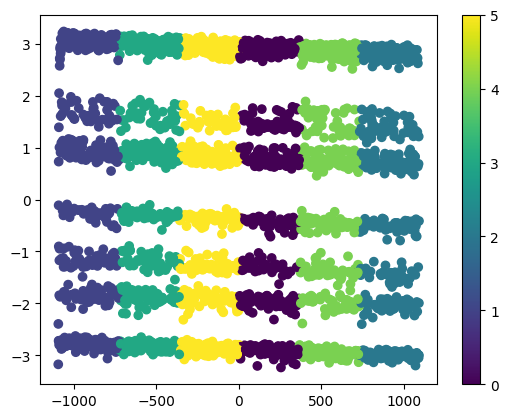

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Redukcja wymiarowości do 2D
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_encoded)

# Tworzenie wykresu
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.show()

In [116]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Obliczanie Silhouette Score
s_score = silhouette_score(x_train_encoded, labels)

# Obliczanie Davies-Bouldin Index
db_score = davies_bouldin_score(x_train_encoded, labels)

print(f'Silhouette Score: {s_score}')
print(f'Davies-Bouldin Index: {db_score}')

Silhouette Score: 0.552976131439209
Davies-Bouldin Index: 0.5007073812895547


In [89]:
from keras.layers import Input, Dense
from keras.models import Model

# Rozmiar naszej reprezentacji kodowanej
encoding_dim = 32

# Definiowanie naszego autoenkodera
input_data = Input(shape=(12,))
encoded = Dense(encoding_dim, activation='relu')(input_data)
decoded = Dense(12, activation='sigmoid')(encoded)
autoencoder = Model(input_data, decoded)

# Trenowanie autoenkodera
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(df4, df4, epochs=50, batch_size=256, shuffle=True)

# Użycie kodera do przekształcenia naszych danych do mniejszego wymiaru
encoder = Model(input_data, encoded)
x_train_encoded = encoder.predict(df4)

# Teraz możemy sklastrować nasze przekształcone dane za pomocą K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(x_train_encoded)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.7100
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - loss: 0.7203
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 0.7146
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 0.7175
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 0.7111
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 0.7139
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - loss: 0.7119
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - loss: 0.7072
Epoch 9/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - loss: 0.7166
Epoch 10/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - loss: 0.7080
Epoch 11/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 0.7072
Epoch 12/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 0.7092
Epoch 13/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 0.7084
Epoch 14/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 0.7140
Epoch 15/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - lo

KMeans(n_clusters=6, random_state=42)

In [90]:
# Przewiduj etykiety klastrów dla danych
labels = kmeans.predict(x_train_encoded)

# Wyświetl etykiety klastrów
print(labels)

# Wyświetl centra klastrów
print(kmeans.cluster_centers_)

[1 2 0 ... 2 2 2]
[[3.97375554e-01 4.83282506e-02 5.17775059e-01 5.21486700e-02
  4.64582860e-01 8.06108117e-03 3.76384258e-02 7.71445036e-03
  4.64010239e-03 2.83925891e-01 2.96362340e-01 2.03478128e-01
  9.39782917e-01 8.68871808e-04 2.40097627e-01 7.26243407e-02
  1.34178519e-01 2.36385792e-01 1.25050926e+00 9.77422357e-01
  3.95900458e-02 2.81160474e-02 3.04924816e-01 8.28476250e-02
  7.72247240e-02 3.82125378e-04 2.28413850e-01 2.04923496e-01
  2.81427205e-02 1.95866764e-01 7.59602934e-02 2.26013720e-01]
 [1.19289026e-01 2.81217843e-01 4.00980234e-01 5.54809988e-01
  9.72787589e-02 4.27427411e-01 1.27908361e+00 3.31456989e-01
  2.90173769e-01 4.89092708e-01 2.00003996e-01 4.75569427e-01
  5.32279611e-02 3.18918258e-01 9.87172872e-02 1.35771215e-01
  8.15136880e-02 4.96301472e-01 5.49046993e-02 6.72177672e-02
  2.55666882e-01 6.07766509e-01 1.16997361e-02 2.24794492e-01
  2.17791080e-01 3.23754489e-01 2.49887243e-01 2.82361835e-01
  8.11272860e-01 5.70092857e-01 6.34614468e-01 2.72

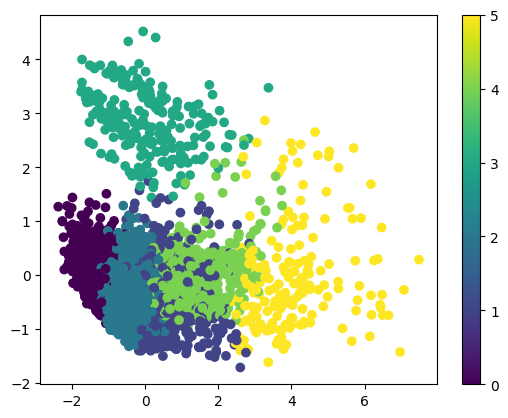

In [91]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Redukcja wymiarowości do 2D
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_encoded)

# Tworzenie wykresu
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.show()

In [92]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Obliczanie Silhouette Score
s_score = silhouette_score(x_train_encoded, labels)

# Obliczanie Davies-Bouldin Index
db_score = davies_bouldin_score(x_train_encoded, labels)

print(f'Silhouette Score: {s_score}')
print(f'Davies-Bouldin Index: {db_score}')

Silhouette Score: 0.14559832215309143
Davies-Bouldin Index: 1.7095873880431955


In [107]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Rozmiar naszej reprezentacji kodowanej
encoding_dim = 32

# Definiowanie naszego autoenkodera
input_data = Input(shape=(12,))
encoded = Dense(64, activation='relu')(input_data)
encoded = Dropout(0.5)(encoded)  # Dodanie warstwy Dropout
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(0.5)(decoded)  # Dodanie warstwy Dropout
decoded = Dense(12, activation='sigmoid')(decoded)
autoencoder = Model(input_data, decoded)

# Trenowanie autoenkodera
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
autoencoder.fit(df4, df4, epochs=100, batch_size=256, shuffle=True)

# Użycie kodera do przekształcenia naszych danych do mniejszego wymiaru
encoder = Model(input_data, encoded)
x_train_encoded = encoder.predict(df4)

# Teraz możemy sklastrować nasze przekształcone dane za pomocą K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(x_train_encoded)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - loss: 0.6919
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.5144
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.2199
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -0.3994 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: -1.8548
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: -5.4652
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: -13.4164
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -34.2674 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: -71.4416
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -147.5031 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -263.7919 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: -440.6396 
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -759.2888 
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -1128.6384
Epoch 15/100
14/14 ━━━━━━━

KMeans(n_clusters=6, random_state=42)

In [108]:
# Przewiduj etykiety klastrów dla danych
labels = kmeans.predict(x_train_encoded)

# Wyświetl etykiety klastrów
print(labels)

# Wyświetl centra klastrów
print(kmeans.cluster_centers_)

[3 0 0 ... 0 5 0]
[[ 4.24493408e+01  4.18006592e+01  4.18972168e+01  4.24527588e+01
   4.22790527e+01  1.24811646e+02  4.17153320e+01  4.13333740e+01
   4.16165771e+01  4.17246094e+01  1.25727844e+02  4.22490234e+01
   4.20281982e+01  4.23211670e+01  4.19514160e+01  4.23051758e+01
   3.97423096e+01  4.17983398e+01  4.17006836e+01  4.27204590e+01
   4.20235596e+01  4.16105957e+01  4.19143066e+01  4.16959229e+01
   4.24432373e+01  4.18790283e+01  4.12882080e+01  4.14553223e+01
   4.18105469e+01  4.19449463e+01  4.17143555e+01  4.17761230e+01]
 [ 5.90450439e+03  5.83128564e+03  5.85030566e+03  5.91935938e+03
   5.90048389e+03  1.52587891e-05  5.81825049e+03  5.78051172e+03
   5.80982812e+03  5.82884180e+03  1.52587891e-05  5.88365234e+03
   5.84305371e+03  5.91136377e+03  5.85602881e+03  5.88835547e+03
   5.43416504e+03  5.83329932e+03  5.79387842e+03  5.95401074e+03
   5.85991162e+03  5.82386523e+03  5.85312500e+03  5.82403516e+03
   5.90932080e+03  5.87388623e+03  5.79021680e+03  5.7775

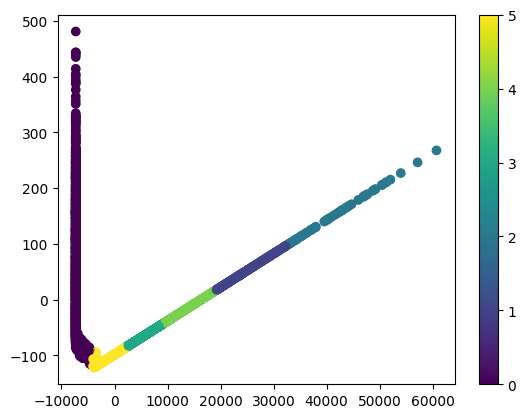

In [109]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Redukcja wymiarowości do 2D
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_encoded)

# Tworzenie wykresu
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.show()

In [110]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Obliczanie Silhouette Score
s_score = silhouette_score(x_train_encoded, labels)

# Obliczanie Davies-Bouldin Index
db_score = davies_bouldin_score(x_train_encoded, labels)

print(f'Silhouette Score: {s_score}')
print(f'Davies-Bouldin Index: {db_score}')

Silhouette Score: 0.7289667129516602
Davies-Bouldin Index: 0.4907027443214383


In [112]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Rozmiar naszej reprezentacji kodowanej
encoding_dim = 32

# Definiowanie naszego autoenkodera
input_data = Input(shape=(14,))
encoded = Dense(64, activation='relu')(input_data)
encoded = Dropout(0.5)(encoded)  # Dodanie warstwy Dropout
encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(0.5)(decoded)  # Dodanie warstwy Dropout
decoded = Dense(14, activation='sigmoid')(decoded)
autoencoder = Model(input_data, decoded)

# Trenowanie autoenkodera
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
autoencoder.fit(df3_le, df3_le, epochs=100, batch_size=256, shuffle=True)

# Użycie kodera do przekształcenia naszych danych do mniejszego wymiaru
encoder = Model(input_data, encoded)
x_train_encoded = encoder.predict(df3_le)

# Teraz możemy sklastrować nasze przekształcone dane za pomocą K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(x_train_encoded)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 862us/step - loss: -31034.8125
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: -144175.4844
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - loss: -380830.2500
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: -891409.8125
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: -1907175.6250
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: -4028464.0000
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: -7790937.0000
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: -14431878.0000
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -25008678.0000 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -41556544.0000 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: -65456788.0000 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: -98400160.0000
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: -149762208.0000
Epoch 14/100
14/14 ━━━

KMeans(n_clusters=6, random_state=42)

In [113]:
# Przewiduj etykiety klastrów dla danych
labels = kmeans.predict(x_train_encoded)

# Wyświetl etykiety klastrów
print(labels)

# Wyświetl centra klastrów
print(kmeans.cluster_centers_)

[3 4 2 ... 5 2 2]
[[ 762483.8    770328.4    768620.56   766213.2    770500.8    769331.
   769481.     771216.5    748709.75   754711.44   775909.4    769381.25
   774224.75   737564.     771987.9    770761.9    772140.2    781383.4
   773473.06   766232.7    767089.4    768551.8    770779.9    752795.56
   771160.06   756035.     771101.9    775803.9    772395.2    741696.3
   771818.6    762852.   ]
 [ 326280.88   329635.8    328907.12   327876.34   329708.9    329208.5
   329275.5    330018.16   320389.56   322955.9    332023.38   329231.8
   331304.94   315618.8    330345.34   329823.28   330413.47   334367.5
   330983.06   327883.34   328252.25   328876.75   329829.53   322134.47
   329994.66   323520.4    329968.25   331980.1    330523.16   317386.78
   330273.75   326438.47 ]
 [1205742.8   1218149.5   1215446.9   1211640.5   1218423.    1216573.1
  1216807.2   1219551.8   1183958.2   1193451.    1226976.    1216650.8
  1224309.1   1166334.5   1220774.8   1218833.    1221012.2  

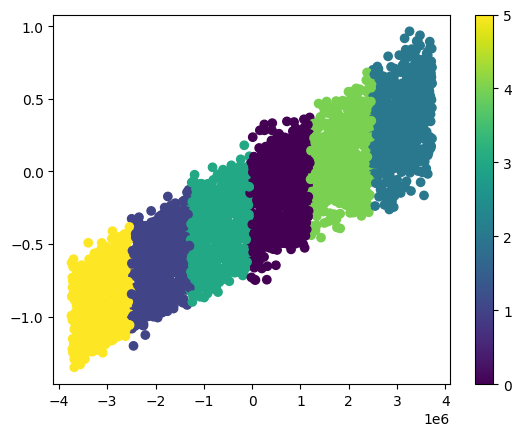

In [114]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Redukcja wymiarowości do 2D
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_encoded)

# Tworzenie wykresu
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=labels, cmap='viridis')
plt.colorbar()
plt.show()

In [115]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Obliczanie Silhouette Score
s_score = silhouette_score(x_train_encoded, labels)

# Obliczanie Davies-Bouldin Index
db_score = davies_bouldin_score(x_train_encoded, labels)

print(f'Silhouette Score: {s_score}')
print(f'Davies-Bouldin Index: {db_score}')

Silhouette Score: 0.552976131439209
Davies-Bouldin Index: 0.5007073812895547
